# **Trabalho Final PDM - Análise de Sentimentos**
#### **Disciplina: Computação Paralela**
#### **Professor: Sávio**

#### **Alunos:**
**- Gustavo Rodrigues Ribeiro / RA:202003570** \
**- Khalil Alves / RA: 202103745** \
**- Keven Lucas / RA: 202000181** \
**- Matheus Leonel / RA:  202109822** \
**- Salvador Ludovico / RA: 202204038**


# **Domínio do Negócio: E-commerce**
### Para este projeto, o domínio de negócio escolhido será o de e-commerce com foco na análise de sentimentos em avaliações de produtos. As avaliações são obtidas de um dataset público de avaliações de produtos eletrônicos, como o Amazon Product Reviews Dataset, que oferece avaliações reais em várias categorias de produtos.

## Iniciando o PySpark

**OBS: Necessário caso utilize Google Coolab ou outra plataforma para criação de códigos em Jupyter Notebook, no entanto, se utilizar o JupyterLab em um Dataproc no Google Cloud Console, essa etapa pode desconsiderada.**

Esta célula de código instala o Spark no ambiente de execução Colab. Aqui está uma explicação passo a passo:

1. **`!apt-get install openjdk-11-jdk-headless -qq > /dev/null`**: este comando instala o OpenJDK 11 (versão headless, sem interface gráfica), que é um requisito para o Spark. O `-qq` suprime a saída e o `> /dev/null` redireciona a saída para o nada, tornando o processo mais silencioso.

2. **`!wget -q https://dlcdn.apache.org/spark/spark-3.5.2/spark-3.5.3-bin-hadoop3.tgz`**: Este comando baixa o arquivo compactado do Spark 3.5.2 (construído para o Hadoop 3) do site oficial do Apache Spark. O `-q` suprime a saída de download.

3. **`!tar xf spark-3.5.3-bin-hadoop3.tgz`**: Este comando extrai o arquivo compactado baixado do Spark, criando um diretório chamado `spark-3.5.3-bin-hadoop3`.

4. **`!pip -q install findspark`**: Este comando instala a biblioteca `findspark` usando `pip`. Findspark é uma biblioteca Python que torna mais fácil configurar o Spark em um ambiente Python, principalmente no Colab. Ela define as variáveis de ambiente necessárias para que o Spark funcione corretamente.

Após executar essas linhas, você terá o Spark instalado e pronto para ser usado em seu notebook Colab.

## Conexão Via Unix/Colab/GCP

In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz
!tar xf spark-3.5.6-bin-hadoop3.tgz
!pip -q install findspark

Defina as variáveis de ambiente do Spark:

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.6-bin-hadoop3"

O código a seguir garante que o Spark seja configurado corretamente e esteja pronto para uso em seu ambiente Python.

* **`findspark.init()`**: executa a função `init()` do módulo `findspark`. Esta função:
    * Localiza a instalação do Spark em seu sistema.
    * Configura as variáveis de ambiente necessárias para que o Python possa interagir com o Spark. Isso permite que o driver Python (seu código Python) se comunique com o executor Spark (o código que realmente processa os dados).


In [ ]:
import findspark
findspark.init()

## Conexão Via Windows

Depois de executar a célula anterior, você poderá importar e usar as bibliotecas Spark como `pyspark.sql.SparkSession` para criar uma sessão Spark e começar a trabalhar com dados.

In [ ]:
import os
import requests
import tarfile
import sys

# --- 1. Baixar o Spark (substitui o wget) ---
spark_version = "3.5.6"  # Usando uma versão estável e popular
hadoop_version = "3"
spark_url = f"https://dlcdn.apache.org/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz"
spark_filename = os.path.basename(spark_url)
spark_foldername = spark_filename.replace(".tgz", "")

print(f"Baixando {spark_filename}...")
# Faz o download apenas se o arquivo não existir
if not os.path.exists(spark_filename):
    response = requests.get(spark_url, stream=True)
    if response.status_code == 200:
        with open(spark_filename, "wb") as f:
            f.write(response.raw.read())
        print("Download completo.")
    else:
        print(f"Erro ao baixar o arquivo. Status: {response.status_code}")
else:
    print("Arquivo Spark já existe, pulando download.")

# --- 2. Extrair o Spark (substitui o tar) ---
print(f"Extraindo {spark_filename}...")
# Extrai apenas se a pasta de destino não existir
if not os.path.exists(spark_foldername):
    with tarfile.open(spark_filename, "r:gz") as tar:
        tar.extractall()
    print("Extração completa.")
else:
    print("Pasta do Spark já existe, pulando extração.")

!pip -q install findspark

print("\nConfiguração inicial concluída!")

Baixando spark-3.5.6-bin-hadoop3.tgz...
Arquivo Spark já existe, pulando download.
Extraindo spark-3.5.6-bin-hadoop3.tgz...
Pasta do Spark já existe, pulando extração.

Configuração inicial concluída!



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
import findspark

# --- Configurar as Variáveis de Ambiente para o Python ---

# Caminho para a pasta do Spark que foi extraída
# Use os.path.abspath para garantir um caminho absoluto e compatível com Windows
spark_home = os.path.abspath("spark-3.5.6-bin-hadoop3")

# ATENÇÃO: Verifique se este caminho do JAVA_HOME está correto para a sua máquina!
# Deve ser o mesmo que você configurou nas variáveis de ambiente do Windows.
java_home = r"C:\Program Files\Java\zulu21.34.19-ca-jdk21.0.3-win_x64"
hadoop_home = r"C:\hadoop-3.3.6"

print(f"SPARK_HOME: {spark_home}")
print(f"JAVA_HOME: {java_home}")
print(f"HADOOP_HOME: {hadoop_home}")

# Define as variáveis de ambiente para a sessão atual
os.environ["SPARK_HOME"] = spark_home
os.environ["JAVA_HOME"] = java_home
os.environ["HADOOP_HOME"] = hadoop_home

# Adiciona os binários do Spark e Hadoop ao PATH do sistema
os.environ["PATH"] = f"{os.environ['SPARK_HOME']}\\bin;{os.environ['HADOOP_HOME']}\\bin;{os.environ['PATH']}"

# --- Inicializar o findspark ---
findspark.init()

SPARK_HOME: c:\Users\gusta\Desktop\TrabalhoFinalCP\spark-3.5.6-bin-hadoop3
JAVA_HOME: C:\Program Files\Java\zulu21.34.19-ca-jdk21.0.3-win_x64
HADOOP_HOME: C:\hadoop-3.3.6


## Conectando ao Drive

Aqui estaremos sincronizando nossa conta no Drive ao ambiente Colab, para que os arquivos em nuvem sejam gerenciados (lidos e escritos) e manipulados diretamente no Drive.

**OBS: Caso esteja utilizando o Dataproc do Google Cloud Console, com o ambiente virtual Jupyter Notebook, você podera utilizar o Data Lake Google Cloud Storage (GCS) que está conectado a sua conta, não necessitando desse processo de sincronização com o Drive.**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive

MyDrive  Shareddrives


## Importações e Função Para Criação da Sessão Spark

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession, DataFrame
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.storagelevel import StorageLevel
from pyspark.ml import Pipeline
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import PipelineModel
import os

Função para criação da sessão

In [ ]:
def get_spark_session(cores):
    """Cria uma sessão Spark em modo local com um número definido de cores."""
    return SparkSession.builder \
        .appName(f"DeployLayerAnalysis_Cores_{cores}") \
        .master(f"local[{cores}]") \
        .config("spark.driver.memory", "32g") \
        .getOrCreate()

## **Implantação do Modelo: Deploy**

Função da Tarefa a ser Medida (Processamento do Deploy)

In [ ]:
def run_deploy_batch_task(spark, model_path, silver_data_path):
    """
    Carrega um modelo treinado e o aplica a um grande lote de dados (inferência em lote).
    Esta é a verdadeira tarefa de deploy paralelizável.
    """
    print(f"Carregando o modelo treinado de: {model_path}")
    modelo = PipelineModel.load(model_path)

    print(f"Carregando dados para inferência de: {silver_data_path}")
    # Vamos usar todos os dados da camada silver como um grande lote de teste
    # Em um cenário real, poderíamos usar apenas o test_df
    batch_df = spark.read.parquet(silver_data_path)
    # batch_df = batch_df.sample(fraction=0.1)  # 10% dos dados
    print(f"Quantidade de reviews avaliadas: {batch_df.count()}")

    # ---- INFERÊNCIA EM LOTE (Operação Paralela) ----
    print("Aplicando o modelo a todo o DataFrame de uma só vez...")
    # O .transform aplica todas as etapas do pipeline (tokenizer, etc.) e o modelo
    # a cada linha do DataFrame em paralelo.
    predictions_df = modelo.transform(batch_df)

    print("Tarefa de inferência em lote concluída.")

    return predictions_df

Definindo Caminhos

In [ ]:
# Defina os caminhos para seus dados
silver_data_path = r"C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Silver\reviews_silver"
model_path = r"C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Gold\logistc_regression_model"
predictions_output_path = r"C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Gold\predictions"

In [ ]:
core_counts = [1, 2, 4, 6]  # Ajuste para os núcleos da sua máquina
results = []

print("Iniciando experimento de desempenho da Inferência em Lote (Deploy)...")

for cores in core_counts:
    print(f"\n---------- EXECUTANDO COM {cores} CORE(S) ----------")

    spark = get_spark_session(cores)
    start_time = time.time()

    predictions_df_current_run = run_deploy_batch_task(spark, model_path, silver_data_path)

    end_time = time.time()
    execution_time = end_time - start_time

    results.append({
        "num_cores": cores,
        "execution_time": execution_time
    })

    print(f"Tempo de execução: {execution_time:.2f} segundos")

    # Se esta for a última iteração (ou a que você quer salvar), mantenha a referência ao DataFrame antes de parar a sessão.
    if cores == core_counts[-1]:
        predictions_df = predictions_df_current_run
    else:
        # Para a sessão para liberar recursos para iterações futuras
        spark.stop()

if predictions_df is not None:
    print(f"\nEscrevendo dados da Predição para: {predictions_output_path}")
    # Salva o DataFrame como tabela da camada Silver (formato .parquet)
    predictions_df.write.mode("overwrite").option("header", True).parquet(predictions_output_path)
    spark.stop()
else:
    print("Nenhum dataframe para salvar após o loop.")

Iniciando experimento de desempenho da Inferência em Lote (Deploy)...

---------- EXECUTANDO COM 1 CORE(S) ----------
Carregando o modelo treinado de: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Gold\logistc_regression_model
Carregando dados para inferência de: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Silver\reviews_silver
Quantidade de reviews avaliadas: 5202047
Aplicando o modelo a todo o DataFrame de uma só vez...
Tarefa de inferência em lote concluída.
Tempo de execução: 10.37 segundos

---------- EXECUTANDO COM 2 CORE(S) ----------
Carregando o modelo treinado de: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Gold\logistc_regression_model
Carregando dados para inferência de: C:\Users\gusta\Desktop\TrabalhoFinalCP\data\Silver\reviews_silver
Quantidade de reviews avaliadas: 5202047
Aplicando o modelo a todo o DataFrame de uma só vez...
Tarefa de inferência em lote concluída.
Tempo de execução: 3.62 segundos

---------- EXECUTANDO COM 4 CORE(S) ----------
Carregando o modelo treinad



--- Análise Final de Desempenho da Inferência em Lote ---
--- Tabela de Resultados ---
                 cores  execution_time  speedup  efficiency
0  Sequencial (1 Core)           10.37     1.00        1.00
1   Paralelo (2 Cores)            3.62     2.87        1.43
2   Paralelo (4 Cores)            3.28     3.16        0.79
3   Paralelo (6 Cores)            3.53     2.94        0.49


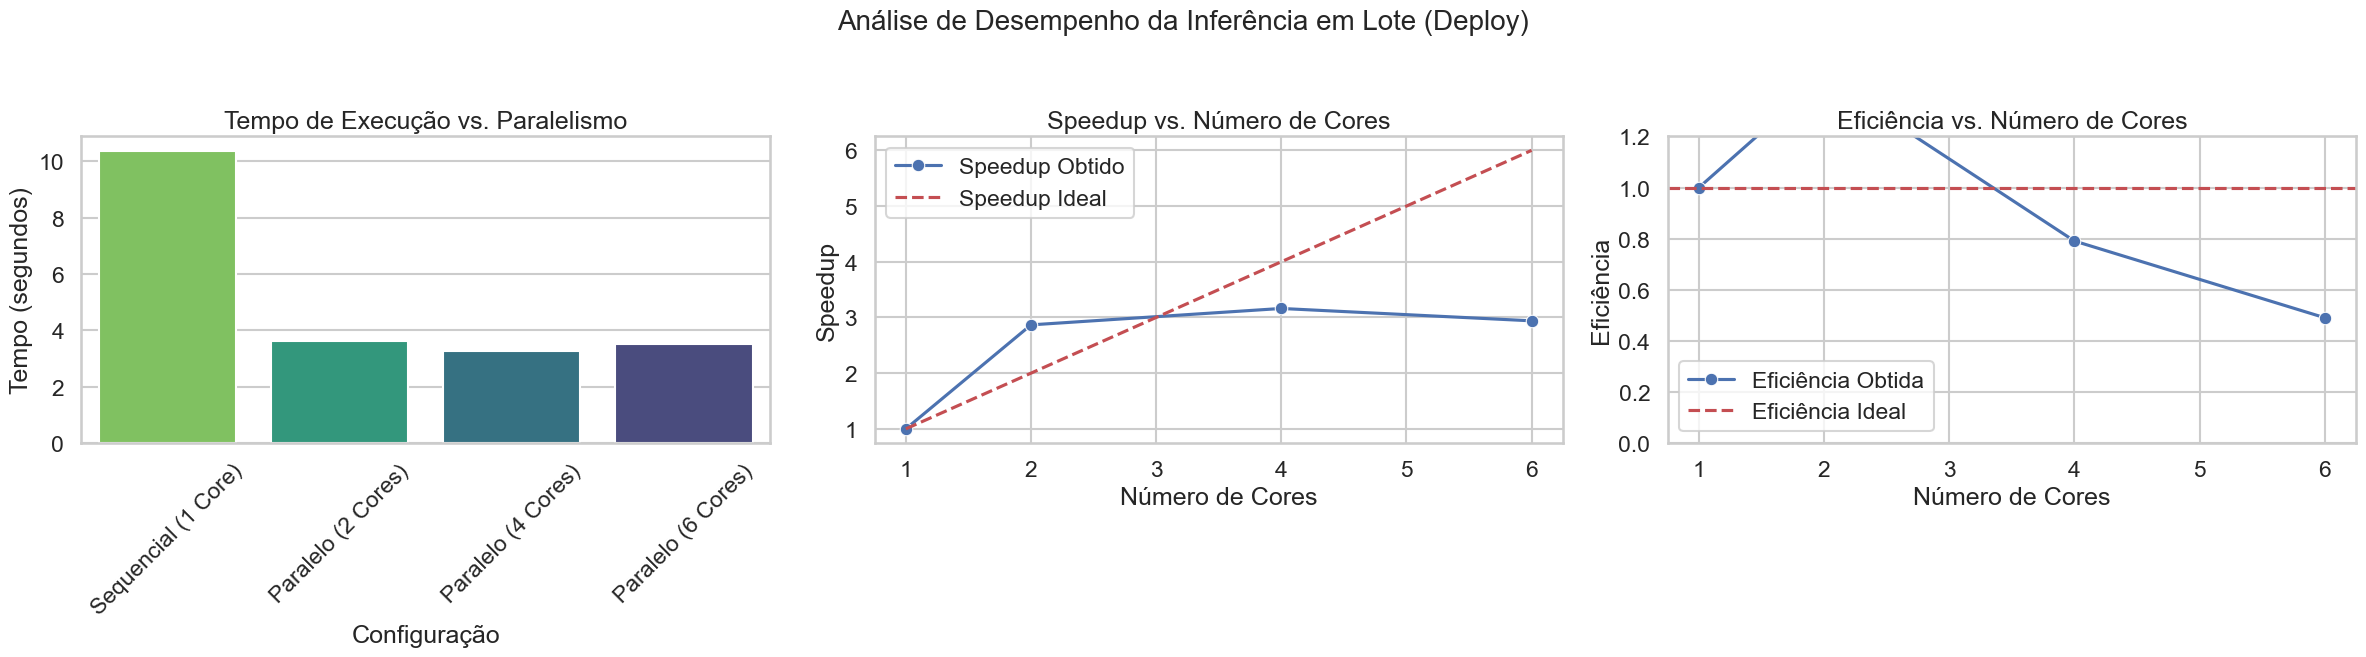

In [ ]:
print("\n\n--- Análise Final de Desempenho da Inferência em Lote ---")

results_df = pd.DataFrame(results)
results_df['cores'] = results_df['num_cores'].apply(lambda x: 'Sequencial (1 Core)' if x == 1 else f'Paralelo ({x} Cores)')

sequential_time = results_df.loc[results_df['num_cores'] == 1, 'execution_time'].iloc[0]
results_df['speedup'] = sequential_time / results_df['execution_time']
results_df['efficiency'] = results_df['speedup'] / results_df['num_cores']

print("--- Tabela de Resultados ---")
print(results_df[['cores', 'execution_time', 'speedup', 'efficiency']].round(2))

sns.set_theme(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, 3, figsize=(24, 7))
fig.suptitle('Análise de Desempenho da Inferência em Lote (Deploy)', fontsize=20)

sns.barplot(ax=axes[0], x='cores', y='execution_time', data=results_df, palette='viridis_r', hue='cores', legend=False)
axes[0].set_title('Tempo de Execução vs. Paralelismo')
axes[0].set_xlabel('Configuração')
axes[0].set_ylabel('Tempo (segundos)')
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(ax=axes[1], x='num_cores', y='speedup', data=results_df, marker='o', label='Speedup Obtido')
axes[1].plot(results_df['num_cores'], results_df['num_cores'], linestyle='--', color='r', label='Speedup Ideal')
axes[1].set_title('Speedup vs. Número de Cores')
axes[1].set_xlabel('Número de Cores')
axes[1].set_ylabel('Speedup')
axes[1].legend()

sns.lineplot(ax=axes[2], x='num_cores', y='efficiency', data=results_df, marker='o', label='Eficiência Obtida')
axes[2].axhline(y=1.0, linestyle='--', color='r', label='Eficiência Ideal')
axes[2].set_title('Eficiência vs. Número de Cores')
axes[2].set_xlabel('Número de Cores')
axes[2].set_ylabel('Eficiência')
axes[2].set_ylim(0, 1.2)
axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Análise

A inferência em lote apresentou o melhor desempenho inicial em termos de speedup e eficiência, especialmente na configuração com 2 núcleos, em que superou o ideal teórico. Isso se deve à natureza embaraçosamente paralela da tarefa, na qual cada linha pode ser processada de forma independente, exigindo comunicação mínima entre os núcleos.

No entanto, observa-se que o ganho de desempenho satura rapidamente: a partir de 4 núcleos, o tempo de execução permanece praticamente constante, e o speedup muito similar (de 3.16 para 2.94), enquanto a eficiência cai de forma significativa.

Esse comportamento sugere que, embora o problema seja ideal para paralelismo, há um limite prático no aproveitamento de recursos além de certo ponto. Isso pode ser causado por overhead de agendamento, uso não uniforme dos núcleos ou restrições na granularidade da tarefa. O cenário reforça a importância de considerar o custo-benefício do escalonamento horizontal, mesmo em tarefas teoricamente paralelizáveis, e ilustra na prática os limites impostos pela Lei de Amdahl.